In [9]:
import zipfile
import os

def extract_zip(zip_path, extract_to):
    """
    Extracts the ZIP file to the specified directory.

    Parameters:
    zip_path (str): Path to the ZIP file.
    extract_to (str): Directory where the ZIP contents should be extracted.

    Returns:
    None
    """
    # Ensure the extraction directory exists
    os.makedirs(extract_to, exist_ok=True)
    
    # Extract the ZIP file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Dataset extracted to: {extract_to}")

# Example usage
extract_zip('archive.zip', 'C:\Users\SS Electronics\Desktop\data x-ray')#run the cell two times beacause of it showing error



FileNotFoundError: [WinError 3] The system cannot find the path specified: ''

In [1]:
from PIL import Image
import os

def remove_corrupted_images(directory):
    """
    Removes corrupted images from the specified directory.

    Parameters:
    directory (str): Path to the directory containing images.

    Returns:
    None
    """
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            # Try to open the image file
            img = Image.open(file_path)
            img.verify()  # Verify that it is an image file
        except (IOError, SyntaxError) as e:
            # If an error occurs, remove the corrupted image
            print(f"Removing corrupted image: {file_path}")
            os.remove(file_path)

# Example usage
remove_corrupted_images('Desktop/data x-ray/archive (6)/train/fractured')


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [5]:
# Set up ImageDataGenerator for training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load the training and validation data
train_generator = train_datagen.flow_from_directory(
    'Desktop/data x-ray/archive (6)',
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary'  # For binary classification (fractured vs non-fractured)
)

validation_generator = val_datagen.flow_from_directory(
    'Desktop/data x-ray/archive (6)',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 9463 images belonging to 2 classes.
Found 9463 images belonging to 2 classes.


In [7]:
def build_model():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

    return model

# Create the model
model = build_model()


C:\python programs\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)




C:\python programs\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9188 - loss: 0.2938

C:\python programs\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 510s 2s/step - accuracy: 0.9189 - loss: 0.2936 - val_accuracy: 0.9368 - val_loss: 0.2074
Epoch 2/20
  1/295 ━━━━━━━━━━━━━━━━━━━━ 6:01 1s/step - accuracy: 0.9375 - loss: 0.2386

C:\python programs\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9375 - loss: 0.2386 - val_accuracy: 0.8696 - val_loss: 0.3114
Epoch 3/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 540s 2s/step - accuracy: 0.9365 - loss: 0.2099 - val_accuracy: 0.9365 - val_loss: 0.1905
Epoch 4/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step - accuracy: 0.9062 - loss: 0.2654 - val_accuracy: 0.9565 - val_loss: 0.1171
Epoch 5/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.9389 - loss: 0.1973 - val_accuracy: 0.9364 - val_loss: 0.1802
Epoch 6/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9062 - loss: 0.2786 - val_accuracy: 1.0000 - val_loss: 0.0435
Epoch 7/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 485s 2s/step - accuracy: 0.9392 - loss: 0.1798 - val_accuracy: 0.9375 - val_loss: 0.1731
Epoch 8/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - accuracy: 0.9375 - loss: 0.1893 - val_accuracy: 0.8696 - val_loss: 0.2630
Epoch 9/20
295/295 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.9359 - loss: 0.1846 - val_accuracy: 0.9

296/296 ━━━━━━━━━━━━━━━━━━━━ 79s 265ms/step - accuracy: 0.9613 - loss: 0.1029
Validation Accuracy: 96.33%


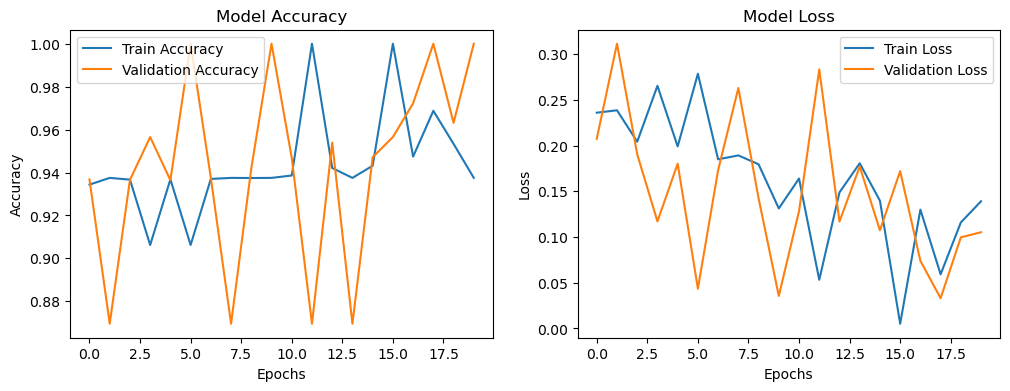

In [15]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [17]:
model.save('fracture_detection_model.h5')
print("Model saved as 'fracture_detection_model.h5'")


Model saved as 'fracture_detection_model.h5'


In [19]:
# Compile the model
model.compile(
    optimizer='adam',             # Optimizer for training
    loss='binary_crossentropy',   # Loss function for binary classification
    metrics=['accuracy']          # Metric to evaluate the performance
)

# Display the model's architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)

print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')


296/296 ━━━━━━━━━━━━━━━━━━━━ 79s 263ms/step - accuracy: 0.9616 - loss: 0.1047
Validation Loss: 0.1026
Validation Accuracy: 96.33%


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict the classes for the validation set
Y_pred = model.predict(validation_generator)
y_pred = np.where(Y_pred > 0.5, 1, 0)  # Convert probabilities to binary output (0 or 1)

# Get the true labels
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_true, y_pred, target_names=['Non-Fractured', 'Fractured'])
print("\nClassification Report:")
print(cr)


296/296 ━━━━━━━━━━━━━━━━━━━━ 85s 285ms/step
Confusion Matrix:
[[8142  721]
 [ 548   52]]

Classification Report:
               precision    recall  f1-score   support

Non-Fractured       0.94      0.92      0.93      8863
    Fractured       0.07      0.09      0.08       600

     accuracy                           0.87      9463
    macro avg       0.50      0.50      0.50      9463
 weighted avg       0.88      0.87      0.87      9463



In [25]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('fracture_detection_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(150, 150)):
    """
    Preprocess the input image to prepare it for prediction.
    :param image_path: Path to the image file.
    :param target_size: Target size to resize the image.
    :return: Preprocessed image ready for model prediction.
    """
    # Load the image
    image = load_img(image_path, target_size=target_size)
    
    # Convert the image to an array
    image = img_to_array(image)
    
    # Expand the dimensions to match the input shape for the model (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)
    
    # Normalize the image (assuming the model was trained with normalized inputs)
    image = image / 255.0
    
    return image


In [41]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = 'x ray test image.jpeg'
predict_fracture(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Prediction: Fractured with probability 85.69%


'Fractured'

In [29]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = 'broken-hand-medical-xray-patient-treatment-74563677.webp'
predict_fracture(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Prediction: Non-Fractured with probability 99.83%


'Non-Fractured'

In [49]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = '2945667385191d66440188d5436a8a_big_gallery.jpeg'
predict_fracture(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Fractured with probability 67.43%


'Fractured'

In [31]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = 'istockphoto-91815962-612x612.jpg'
predict_fracture(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Non-Fractured with probability 100.00%


'Non-Fractured'

In [53]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = 'istockphoto-91815962-612x612.jpg'
predict_fracture(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Non-Fractured with probability 99.89%


'Non-Fractured'

In [33]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = 'istockphoto-471457370-612x612.jpg'
predict_fracture(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: Non-Fractured with probability 100.00%


'Non-Fractured'

In [35]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = 'a00010f04a_kozinf2a-b_kh-compressor.jpg'
predict_fracture(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Fractured with probability 94.24%


'Fractured'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Prediction: Fractured with probability 98.37%


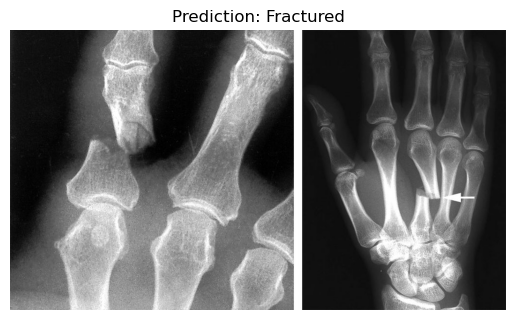

In [63]:
import matplotlib.pyplot as plt

def display_prediction(image_path):
    # Predict the fracture status
    result = predict_fracture(image_path)
    
    # Load and display the image
    image = load_img(image_path)
    plt.imshow(image)
    plt.title(f'Prediction: {result}')
    plt.axis('off')
    plt.show()

# Example usage
display_prediction(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: Fractured with probability 94.24%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Fractured with probability 94.24%


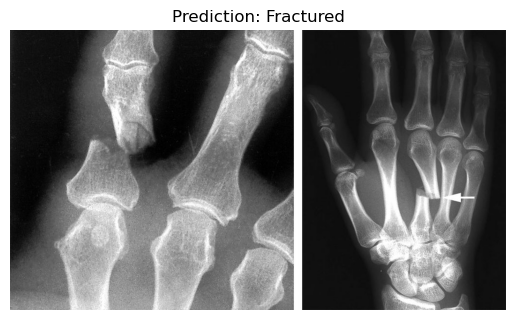

In [39]:
def predict_fracture(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    
    # Make a prediction
    prediction = model.predict(preprocessed_image)
    
    # Interpret the prediction
    result = "Fractured" if prediction[0][0] > 0.5 else "Non-Fractured"
    
    # Print the prediction probability
    probability = prediction[0][0] * 100 if prediction[0][0] > 0.5 else (1 - prediction[0][0]) * 100
    print(f"Prediction: {result} with probability {probability:.2f}%")
    
    return result

# Example usage
image_path = 'a00010f04a_kozinf2a-b_kh-compressor.jpg'
predict_fracture(image_path)
import matplotlib.pyplot as plt

def display_prediction(image_path):
    # Predict the fracture status
    result = predict_fracture(image_path)
    
    # Load and display the image
    image = load_img(image_path)
    plt.imshow(image)
    plt.title(f'Prediction: {result}')
    plt.axis('off')
    plt.show()

# Example usage
display_prediction(image_path)
